
# 🌼 기계학습 및 데이터 전처리 - 3차시(24.11.04)

---


## 1. 피처 엔지니어링의 개념과 중요성
- 피처 엔지니어링이란 데이터를 분석하고 모델을 만들 때 중요한 변수(feature)를 선택하거나 새롭게 생성하는 과정
- 데이터의 특성을 잘 이해하고 반영하여 유의미한 feature를 선택하는 것이 목표

In [154]:
import pandas as pd

In [155]:
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': ['a', 'b', 'c']
}

In [156]:
df = pd.DataFrame(data)
df

,A,B,C
0,1,4,a
1,2,5,b
2,3,6,c


In [157]:
df['A+B'] = df['A'] + df['B']
df

,A,B,C,A+B
0,1,4,a,5
1,2,5,b,7
2,3,6,c,9


In [158]:
df['A+C'] = df['A'].astype(str) + df['C']
df

,A,B,C,A+B,A+C
0,1,4,a,5,1a
1,2,5,b,7,2b
2,3,6,c,9,3c


## 2. 피처 선택과 상관관계 분석
- 피처 간 상관관계를 분석하여 어떤 변수들이 중요한 역할을 하는지 판단할 수 있음
1. 양의 상관관계 :  
두 변수 간에 하나가 증가하면 다른 하나도 증가하는 관계
2. 음의 상관관계 :  
한 변수가 증가할 때 다른 변수가 감소하는 관계

In [159]:
data = {
    '키': [150, 162, 168, 175, 185],   # 키 데이터
    '몸무게': [52, 59, 72, 78, 85],        # 몸무게 데이터
    '시험 점수': [82, 88, 79, 91, 85],         # 시험 점수
    '과제 점수': [81, 87, 80, 89, 86]  # 과제 점수
}

In [160]:
df = pd.DataFrame(data)
df

,키,몸무게,시험 점수,과제 점수
0,150,52,82,81
1,162,59,88,87
2,168,72,79,80
3,175,78,91,89
4,185,85,85,86


In [161]:
corr = df.corr()
print('각 열 간의 피어슨 상관계수')
corr

각 열 간의 피어슨 상관계수


,키,몸무게,시험 점수,과제 점수
키,1.000000,0.978827,0.311204,0.508026
몸무게,0.978827,1.000000,0.221651,0.402715
시험 점수,0.311204,0.221651,1.000000,0.970143
과제 점수,0.508026,0.402715,0.970143,1.000000


In [162]:
from scipy.stats import pearsonr, spearmanr

In [163]:
# 피어슨 상관계수
# 두 변수 간의 상관관계가 통계쩍으로 유의미한지 검정할 수 있는 p-value
pearson_corr, p_val = pearsonr(df['키'], df['몸무게'])
print(f'피어슨 상관계수, 키와 몸무게 : {pearson_corr}, {p_val}')

피어슨 상관계수, 키와 몸무게 : 0.9788265321005255, 0.003686699158616951


In [164]:
# 스피어만 상관계수
# 순서가 중요한 경우에 사용하는 상관계수
spearman_corr, p_val2 = spearmanr(df['시험 점수'], df['과제 점수'])
print(f'스피어만 상관계수, 시험과 과제 점수 : {spearman_corr}, {p_val2}')

스피어만 상관계수, 시험과 과제 점수 : 0.9999999999999999, 1.4042654220543672e-24


In [165]:
# pip install seaborn

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

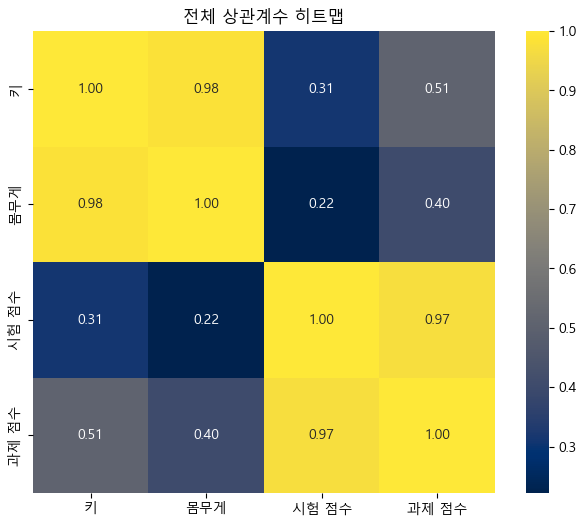

In [168]:
# annot: 칸에 숫자 넣어줘
# square = 그래프를 정확하게 사각형으로 만들어줘
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, square=True, fmt='.2f', cmap='cividis')
plt.title('전체 상관계수 히트맵')
plt.show()

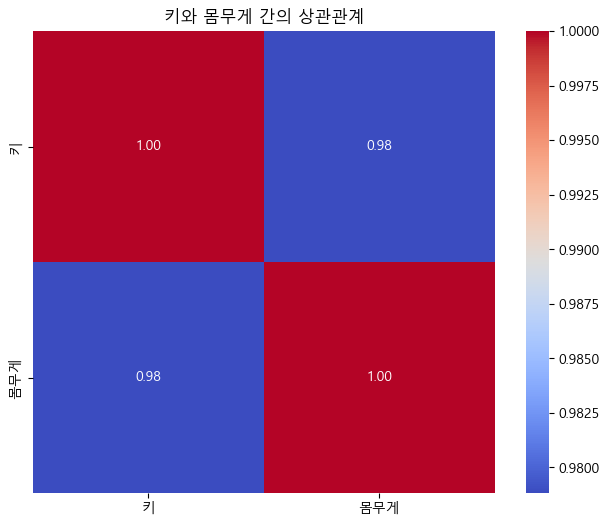

In [169]:
plt.figure(figsize=(8, 6))
high_corr = df[['키', '몸무게']]
sns.heatmap(high_corr.corr(), annot=True, square=True, fmt='.2f', cmap='coolwarm')
plt.title('키와 몸무게 간의 상관관계')
plt.show()

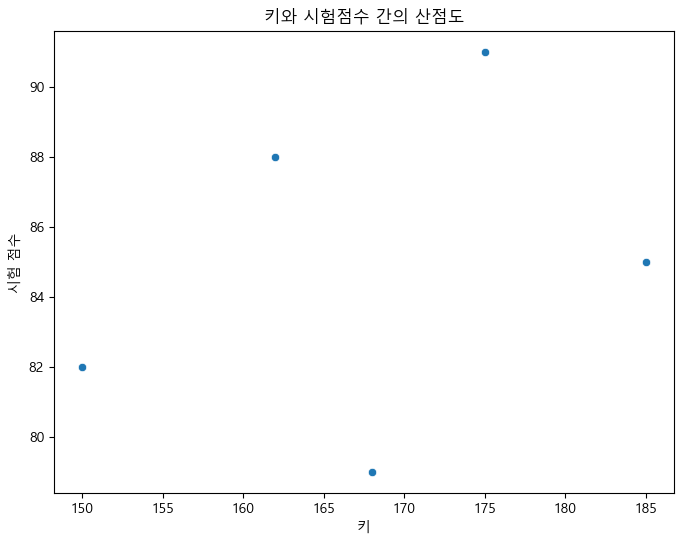

In [170]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='키', y='시험 점수')
plt.title('키와 시험점수 간의 산점도')
plt.show()

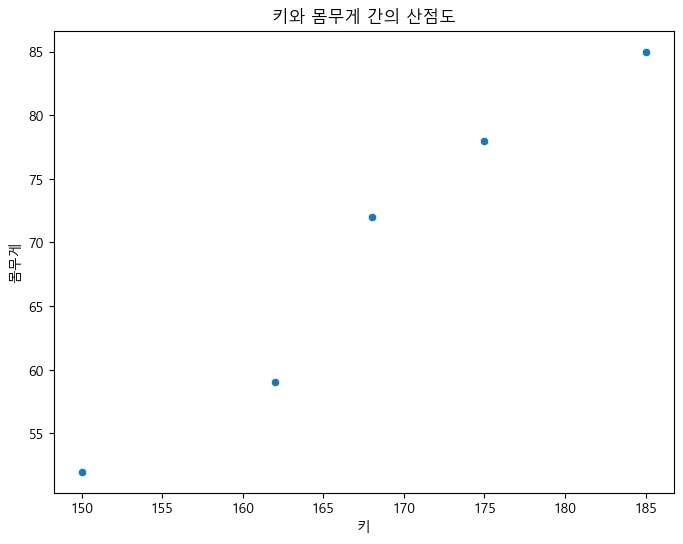

In [171]:
# 선형 관계가 보이므로 강한 상관관계가 있다
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='키', y='몸무게')
plt.title('키와 몸무게 간의 산점도')
plt.show()

## 4. 회귀 분석 - 선형 회귀 (Linear Regression)
- 독립 변수와 종속 변수 사이의 관계를 직선으로 나타내는 방법
- 독립 변수 값에 따라 종속 변수 예측

In [172]:
import pandas as pd


data = {
    '공부 시간': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 6, 7, 2, 5, 4, 9, 8, 7, 10,
               2, 3, 5, 6, 4, 8, 7, 10, 1, 9, 3, 6, 2, 5, 4, 9, 8, 7, 6, 10,
               1, 2, 3, 4, 5, 9, 7, 8, 10, 6],
    '수면 시간': [7, 8, 6, 5, 7, 8, 6, 5, 7, 6, 8, 7, 6, 5, 7, 8, 6, 7, 5, 8,
               7, 6, 5, 8, 7, 6, 8, 5, 6, 7, 5, 8, 7, 6, 8, 5, 7, 6, 8, 5,
               6, 8, 7, 6, 5, 7, 8, 6, 5, 7],
    '시험 점수': [45, 52, 60, 65, 70, 78, 82, 88, 90, 95, 55, 70, 76, 48, 65, 62,
               85, 82, 75, 96, 52, 60, 68, 77, 66, 86, 78, 95, 46, 90, 56, 72,
               50, 66, 63, 85, 83, 74, 70, 92, 48, 55, 62, 64, 68, 89, 80, 85, 96, 73]
}

df = pd.DataFrame(data)

df.head()

,공부 시간,수면 시간,시험 점수
0,1,7,45
1,2,8,52
2,3,6,60
3,4,5,65
4,5,7,70


#### 1. 단순선형회귀

In [173]:
from sklearn.model_selection import train_test_split

X_simple = df[['공부 시간']]  # 모델이 이차원 배열의 형태를 기대
y = df['시험 점수']

X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [174]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_simple, y_train)  

LinearRegression()

In [175]:
y_pred_simple = lr.predict(X_test_simple)

In [176]:
print(f'기울기 : {lr.coef_}, \n예측 값 : {y_pred_simple}')
# 기울기가 5이기 때문에 공부시간을 1시간 늘리면 평균적으로 시험점수가 5점 증가한다는 의미
# 기울기의 절댓값이 클수록 독립 변수에 미치는 영향이 크다

기울기 : [5.11631317], 
예측 값 : [52.85162741 93.78213273 57.96794057 88.66581957 83.5495064  93.78213273
 78.43319324 83.5495064  52.85162741 93.78213273]


In [177]:
result = pd.DataFrame({
    '공부 시간': X_test_simple['공부 시간'],
    '실제 시험 점수': y_test,
    '예측 시험 점수': y_pred_simple
})

result.head()

,공부 시간,실제 시험 점수,예측 시험 점수
13,2,48,52.851627
39,10,92,93.782133
30,3,56,57.967941
45,9,89,88.665820
17,8,82,83.549506


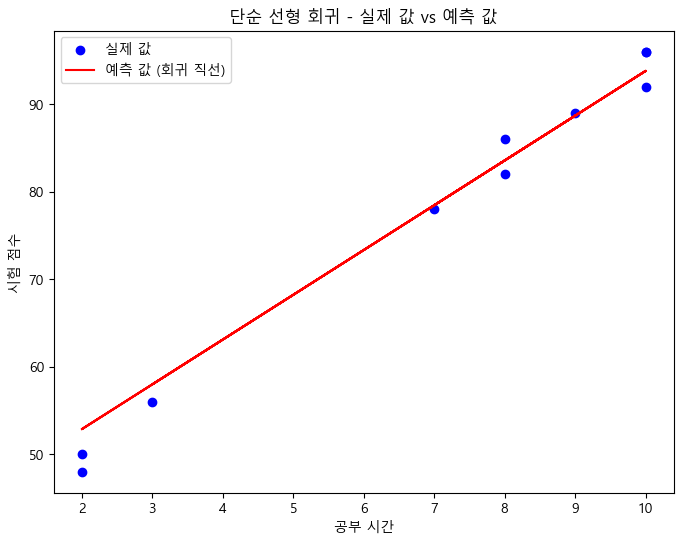

In [178]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='실제 값')
plt.plot(X_test_simple, y_pred_simple, color='red', label='예측 값 (회귀 직선)')
plt.xlabel('공부 시간')
plt.ylabel('시험 점수')
plt.title('단순 선형 회귀 - 실제 값 vs 예측 값')
plt.legend()
plt.show()

#### 평가

In [179]:
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred_simple)  # 1과 가까울수록 좋은 모델
print(f'결정계수: {r2}')

rmse = root_mean_squared_error(y_test, y_pred_simple)  # 값이 작을수록 예측이 잘 된 것
print(f'평균 제곱근 오차 (RMSE): {rmse}')  

결정계수: 0.9821508223349446
평균 제곱근 오차 (RMSE): 2.3929468624953736


#### 2.다중선형회귀

In [180]:
df.head()

,공부 시간,수면 시간,시험 점수
0,1,7,45
1,2,8,52
2,3,6,60
3,4,5,65
4,5,7,70


In [181]:
X_multiple = df[['공부 시간', '수면 시간']]
y = df['시험 점수']

X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

In [182]:
multi_lr = LinearRegression()

In [183]:
multi_lr.fit(X_train_multiple, y_train)

LinearRegression()

In [184]:
y_pred_multiple = multi_lr.predict(X_test_multiple)

In [185]:
print(f'기울기: {multi_lr.coef_}, \n예측 값: {y_pred_multiple}')

기울기: [5.13069024 0.13040057], 
예측 값: [52.59374502 93.63926694 57.72443526 88.76937783 83.63868759 93.63926694
 78.63839792 83.50828703 52.85454616 94.03046864]


In [186]:
result_multiple = pd.DataFrame({
    '공부 시간': X_test_multiple['공부 시간'],
    '수면 시간': X_test_multiple['수면 시간'],
    '실제 시험 점수': y_test,
    '예측 시험 점수': y_pred_multiple
})

result_multiple.tail()

,공부 시간,수면 시간,실제 시험 점수,예측 시험 점수
48,10,5,96,93.639267
26,7,8,78,78.638398
25,8,6,86,83.508287
32,2,7,50,52.854546
19,10,8,96,94.030469


In [187]:
df_compare = pd.DataFrame({
    '실제 값': y_test,
    '예측 값': y_pred_multiple
})

df_compare.head()

,실제 값,예측 값
13,48,52.593745
39,92,93.639267
30,56,57.724435
45,89,88.769378
17,82,83.638688


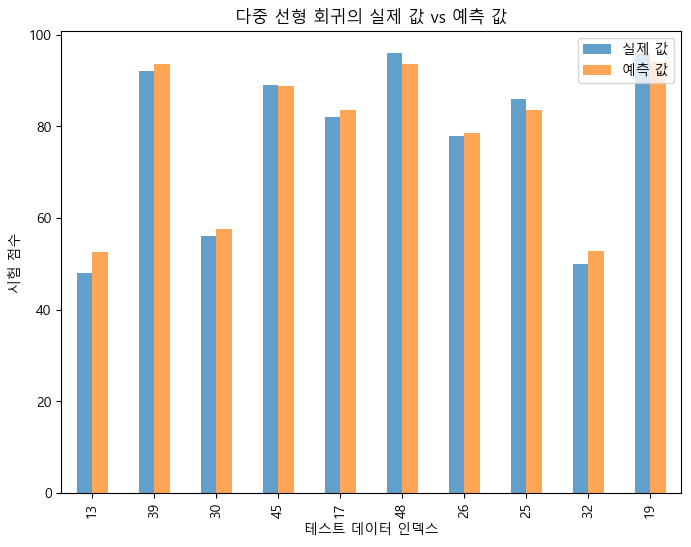

In [188]:
df_compare.plot(kind='bar', figsize=(8, 6), alpha=0.7)
plt.xlabel('테스트 데이터 인덱스')
plt.ylabel('시험 점수')
plt.title('다중 선형 회귀의 실제 값 vs 예측 값')
plt.legend()
plt.show()

#### 평가

In [189]:
r2 = r2_score(y_test, y_pred_multiple)
print(f'결정계수: {r2}')

rmse = root_mean_squared_error(y_test, y_pred_multiple)
print(f'평균 제곱근 오차: {rmse}')

결정계수: 0.9832553275845392
평균 제곱근 오차: 2.3177269808163308


## 4. 회귀 분석 - 로지스틱 회귀 (Logistic Regression)
- 이름엔 회귀가 들어가 있지만 회귀 모델이 아닌 분류 모델
- 독립 변수 값에 따라 종속 변수가 각 클래스에 속할 확률을 예측!
- 선형 회귀의 예측값을 시그모이드 함수에 통과시켜 0과 1사이의 확률값으로 변환

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [191]:
df = pd.read_csv('./data/Logistic_data.csv')
df.head()

,age,income,purchase
0,16.0,30196.0,1
1,38.0,71558.0,1
2,48.0,66315.0,1
3,48.0,23934.0,1
4,34.0,37159.0,1


In [192]:
X_log = df[['age', 'income']]
y_log = df['purchase']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2)

lgr = LogisticRegression()
lgr.fit(X_train_log, y_train_log)

LogisticRegression()

In [193]:
y_pred_log = lgr.predict(X_test_log)
y_pred_log

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [194]:
result = pd.DataFrame({
    'age': X_test_log['age'],
    'income': X_test_log['income'],
    'real purchase': y_test_log,
    'predict purcahse': y_pred_log
})

result.head(10)

,age,income,real purchase,predict purcahse
122,9.0,61729.0,0,0
54,29.0,31592.0,1,1
13,-6.0,39333.0,0,0
104,14.0,13892.0,0,0
21,1.0,17907.0,0,0
189,32.0,36091.0,1,1
162,18.0,49271.0,0,0
34,48.0,70602.0,1,1
183,30.0,38076.0,1,1
43,38.0,43803.0,1,1


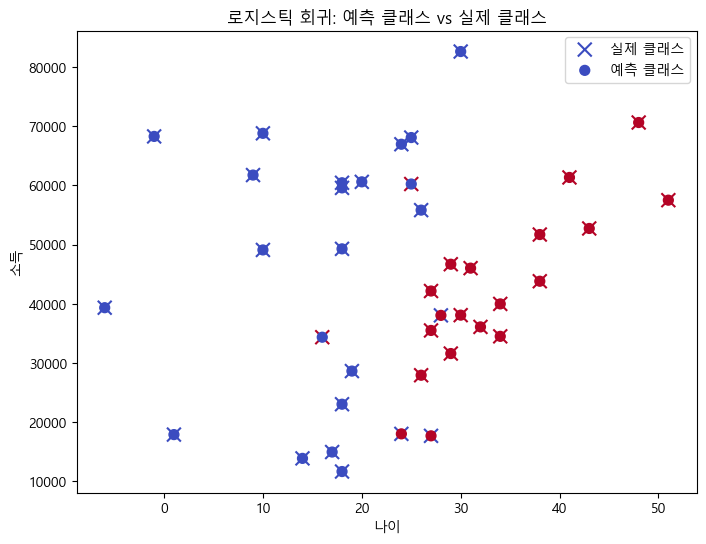

In [195]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_log['age'], X_test_log['income'], c=y_test_log, cmap='coolwarm', marker='x', s=100, label='실제 클래스')
plt.scatter(X_test_log['age'], X_test_log['income'], c=y_pred_log, cmap='coolwarm', marker='o', s=50, label='예측 클래스')
plt.xlabel('나이')
plt.ylabel('소득')
plt.title('로지스틱 회귀: 예측 클래스 vs 실제 클래스')
plt.legend()
plt.show()

#### 로지스틱회귀의 평가

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)  # 스팸 분류 (거짓 긍정을 줄여야 할 때) 중요한 메일이 스팸 분류되면 안되니까
recall = recall_score(y_test_log, y_pred_log)  # (거짓 부정을 줄일 때) 암 환자들이 암이 아니라고 판정되면 안되니까
f1 = f1_score(y_test_log, y_pred_log)

print(f'정확도: {accuracy} \n정밀도: {precision:.3f} \n재현율: {recall:.3f} \nf1: {f1:.3f}')

정확도: 0.875 
정밀도: 0.842 
재현율: 0.889 
f1: 0.865


Text(0.5, 1.0, 'Confusion Matrix')

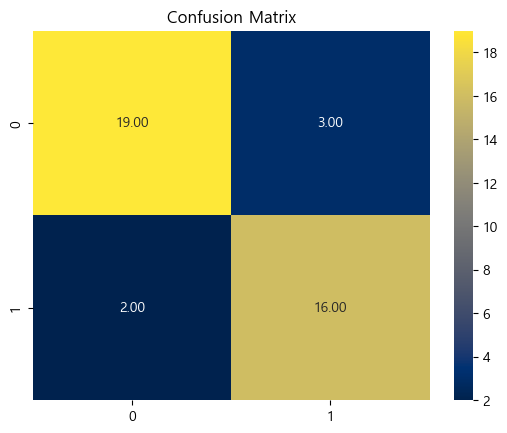

In [321]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test_log, y_pred_log), cmap='cividis', fmt='.2f', annot=True)
plt.title('Confusion Matrix')

In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.84      0.89      0.86        18

    accuracy                           0.88        40
   macro avg       0.87      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



### K-FOLD

In [222]:
from sklearn.model_selection import KFold

# 데이터 준비
data = {
    '공부 시간': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 6, 7, 2, 5, 4, 9, 8, 7, 10,
               2, 3, 5, 6, 4, 8, 7, 10, 1, 9, 3, 6, 2, 5, 4, 9, 8, 7, 6, 10,
               1, 2, 3, 4, 5, 9, 7, 8, 10, 6],
    '수면 시간': [7, 8, 6, 5, 7, 8, 6, 5, 7, 6, 8, 7, 6, 5, 7, 8, 6, 7, 5, 8,
               7, 6, 5, 8, 7, 6, 8, 5, 6, 7, 5, 8, 7, 6, 8, 5, 7, 6, 8, 5,
               6, 8, 7, 6, 5, 7, 8, 6, 5, 7],
    '시험 점수': [45, 52, 60, 65, 70, 78, 82, 88, 90, 95, 55, 70, 76, 48, 65, 62,
               85, 82, 75, 96, 52, 60, 68, 77, 66, 86, 78, 95, 46, 90, 56, 72,
               50, 66, 63, 85, 83, 74, 70, 92, 48, 55, 62, 64, 68, 89, 80, 85, 96, 73]
}
df = pd.DataFrame(data)
X = df[['공부 시간', '수면 시간']]
y = df['시험 점수']

In [223]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

In [224]:
y_test_all = []
y_pred_all = []

In [229]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred)

In [230]:
result_df = pd.DataFrame({
    '실제 값': y_test_all,
    '예측 값': y_pred_all
})

result_df.head()

,실제 값,예측 값
0,48,52.593745
1,82,83.638688
2,96,94.030469
3,86,83.508287
4,78,78.638398


In [231]:
len(result_df)

50

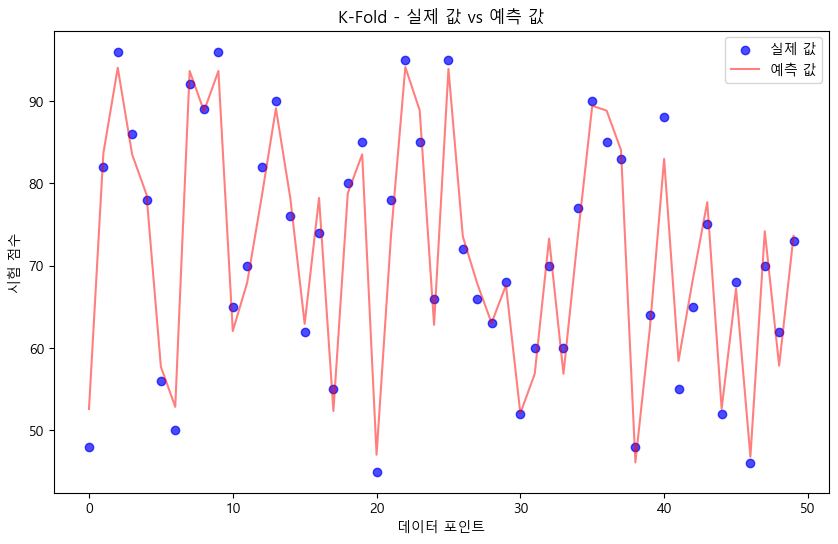

In [235]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(result_df)), result_df['실제 값'], color='blue', label='실제 값', alpha=.7)
plt.plot(result_df['예측 값'].values, color='red', label='예측 값', alpha=.5)
plt.title('K-Fold - 실제 값 vs 예측 값')
plt.xlabel('데이터 포인트')
plt.ylabel('시험 점수')
plt.legend()
plt.show()

In [237]:
r2 = r2_score(y_test_all, y_pred_all)
print(f'결정계수: {r2}')

rmse = root_mean_squared_error(y_test_all, y_pred_all)
print(f'평균 제곱근 오차: {rmse}')  # 3 정도면 나쁘지 않음 

결정계수: 0.9686334641097561
평균 제곱근 오차: 2.571042405950576


### Lasso, Ridge

In [239]:
from sklearn.model_selection import KFold

# 데이터 준비
data = {
    '공부 시간': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 6, 7, 2, 5, 4, 9, 8, 7, 10,
               2, 3, 5, 6, 4, 8, 7, 10, 1, 9, 3, 6, 2, 5, 4, 9, 8, 7, 6, 10,
               1, 2, 3, 4, 5, 9, 7, 8, 10, 6],
    '수면 시간': [7, 8, 6, 5, 7, 8, 6, 5, 7, 6, 8, 7, 6, 5, 7, 8, 6, 7, 5, 8,
               7, 6, 5, 8, 7, 6, 8, 5, 6, 7, 5, 8, 7, 6, 8, 5, 7, 6, 8, 5,
               6, 8, 7, 6, 5, 7, 8, 6, 5, 7],
    '시험 점수': [45, 52, 60, 65, 70, 78, 82, 88, 90, 95, 55, 70, 76, 48, 65, 62,
               85, 82, 75, 96, 52, 60, 68, 77, 66, 86, 78, 95, 46, 90, 56, 72,
               50, 66, 63, 85, 83, 74, 70, 92, 48, 55, 62, 64, 68, 89, 80, 85, 96, 73]
}
df = pd.DataFrame(data)
X = df[['공부 시간', '수면 시간']]
y = df['시험 점수']

In [238]:
from sklearn.linear_model import Lasso, Ridge

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lasso_model = Lasso(alpha=0.1)  # 덜 중요한 변수들의 가중치를 0으로 만들거나 줄인다 (alpha가 커질수록 더 중요한 변수들만 남긴다)

In [243]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [247]:
y_pred = lasso_model.predict(X_test)

print(f'기울기: {lasso_model.coef_}')

기울기: [5.10294738 0.02071367]


In [250]:
features_name = X.columns
features_name

Index(['공부 시간', '수면 시간'], dtype='object')

In [249]:
unimportant = []
important = {}

In [252]:
for i in range(len(lasso_model.coef_)):
    if lasso_model.coef_[i] == 0:
        unimportant.append(features_name[i])
    else:
        important[features_name[i]] = lasso_model.coef_[i]

print(f'중요하지 않다고 판단된 features: {unimportant}, 중요하다고 판단된 feature: {important}')

중요하지 않다고 판단된 features: [], 중요하다고 판단된 feature: {'공부 시간': np.float64(5.102947379457568), '수면 시간': np.float64(0.020713672034482083)}


In [245]:
result_lasso = pd.DataFrame({
    '공부 시간': X_test['공부 시간'],
    '수면 시간': X_test['수면 시간'],
    '실제 시험 점수': y_test,
    '예측 시험 점수': y_pred
})

result_lasso.head()

,공부 시간,수면 시간,실제 시험 점수,예측 시험 점수
13,2,5,48,52.864263
39,10,5,92,93.687842
30,3,5,56,57.967211
45,9,7,89,88.626322
17,8,7,82,83.523375


In [253]:
ridge_model = Ridge(alpha=1.5)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
print(f'기울기: {ridge_model.coef_}')

기울기: [5.09806518 0.10566382]


In [254]:
result_ridge = pd.DataFrame({
    '공부 시간': X_test['공부 시간'],
    '수면 시간': X_test['수면 시간'],
    '실제 시험 점수': y_test,
    '예측 시험 점수': y_pred
})

result_ridge.head()

,공부 시간,수면 시간,실제 시험 점수,예측 시험 점수
13,2,5,48,52.745065
39,10,5,92,93.529586
30,3,5,56,57.843130
45,9,7,89,88.642849
17,8,7,82,83.544783



## 🌼마무리 문제

아래 문제들을 풀어보세요!

Q1. 고양이와 강아지의 체중과 일일 활동 시간 데이터를 분석하여 상관관계를 확인해보세요.

In [200]:
data = {
    '동물 종류': ['고양이', '강아지', '고양이', '강아지', '고양이', '강아지'],
    '체중(kg)': [5, 20, 4, 15, 6, 25],
    '일일 활동 시간(분)': [60, 120, 80, 150, 70, 130]
}

In [201]:
df_dc = pd.DataFrame(data)
df_dc.head()

,동물 종류,체중(kg),일일 활동 시간(분)
0,고양이,5,60
1,강아지,20,120
2,고양이,4,80
3,강아지,15,150
4,고양이,6,70


In [202]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_dc['동물 종류'] = lb.fit_transform(df_dc['동물 종류'])

df_dc.head()

,동물 종류,체중(kg),일일 활동 시간(분)
0,1,5,60
1,0,20,120
2,1,4,80
3,0,15,150
4,1,6,70


In [203]:
df_dc.corr()

,동물 종류,체중(kg),일일 활동 시간(분)
동물 종류,1.000000,-0.930857,-0.948815
체중(kg),-0.930857,1.000000,0.815034
일일 활동 시간(분),-0.948815,0.815034,1.000000


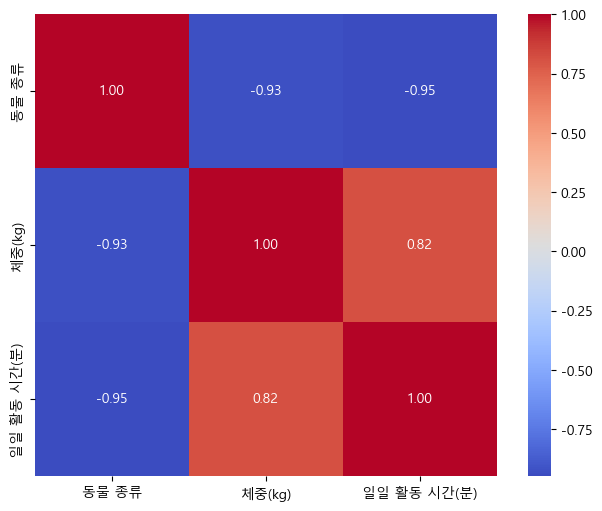

In [204]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_dc.corr(), annot=True, fmt='.2f', square=True, cmap='coolwarm')
plt.show()

Q2. 광고비에 따른 판매량에 대한 데이터를 분석하여 선형 회귀를 통해 예측을 생성해보세요.

In [205]:
data = {
    '광고비': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400,
             750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1550, 1650],
    '판매량': [20, 23, 25, 28, 30, 34, 36, 40, 42, 45,
             27, 29, 31, 35, 37, 41, 43, 46, 48, 50]
}

In [206]:
dfm = pd.DataFrame(data)
dfm.head()

,광고비,판매량
0,500,20
1,600,23
2,700,25
3,800,28
4,900,30


In [207]:
dfm.isnull().sum()

광고비    0
판매량    0
dtype: int64

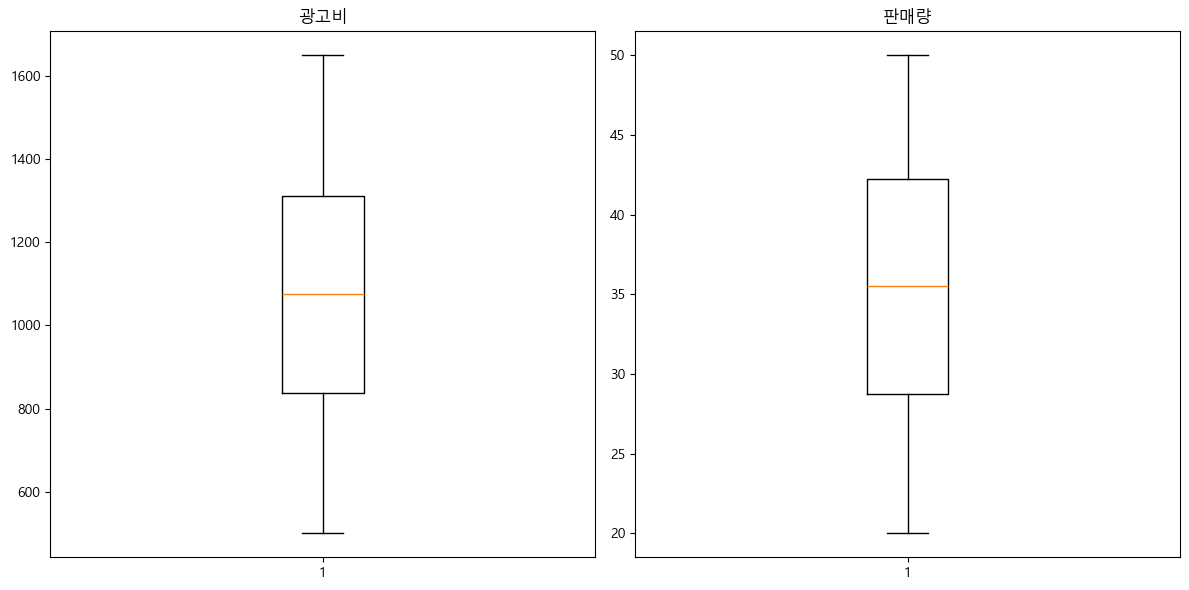

In [208]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, feature in enumerate(dfm.columns.unique()):
    ax = axs[i%2]
    ax.boxplot(dfm[feature])
    ax.set_title(f'{feature}')

plt.tight_layout()
plt.show()

In [209]:
Xm = dfm[['광고비']]
ym = dfm['판매량']

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=42)

lrm = LinearRegression()
lrm.fit(Xm_train, ym_train)

ym_pred = lrm.predict(Xm_test)

print(f'기울기: {lrm.coef_}, \n예측 값: {ym_pred}')

기울기: [0.02712455], 
예측 값: [19.80574065 45.57406458 40.14915428 22.5181958 ]


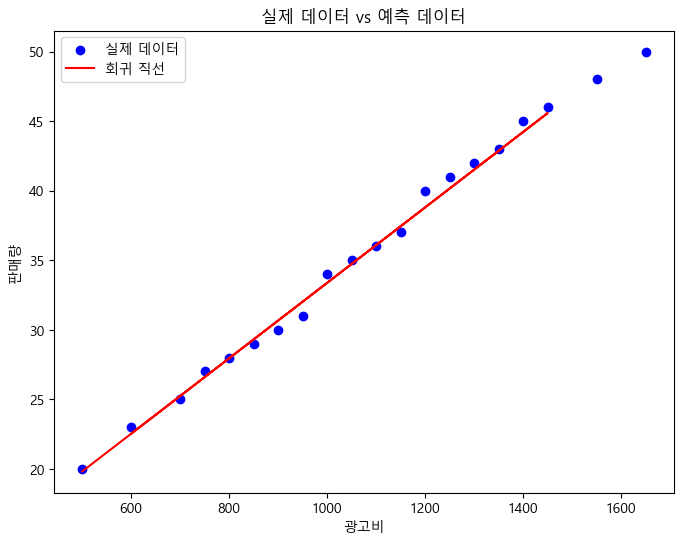

In [210]:
plt.figure(figsize=(8, 6))
plt.scatter(Xm, ym, color='blue', label='실제 데이터')
plt.plot(Xm_test, ym_pred, color='red', label='회귀 직선')
plt.title('실제 데이터 vs 예측 데이터')
plt.xlabel('광고비')
plt.ylabel('판매량')
plt.legend()
plt.show()

In [211]:
r2m = r2_score(ym_test, ym_pred)
print(f'결정계수: {r2m}')

rmsem = root_mean_squared_error(ym_test, ym_pred)
print(f'평균 제곱근 오차: {rmsem}')

# 결정계수가 높지만 평균 제곱근 오차가 크다 > 예측을 잘했다기보단 데이터가 단조롭고 적었기 때문에 잘 맞춘 것이다

결정계수: 0.9976542287300302
평균 제곱근 오차: 0.5420404519625048


Q3. 공부 시간과 학원 출석 여부 데이터를 통해 학업 성취도를 예측해보세요

In [212]:
data = {
    '공부 시간': [1, 3, 2, 4, 5, 6, 2, 5, 4, 3, 7, 8, 5, 6, 3, 4, 2, 1, 6, 7],
    '학업 성취도': ['낮음', '보통', '낮음', '보통', '보통', '높음', '낮음', '보통', '보통', '낮음', '높음', '높음', '보통', '높음', '낮음', '보통', '낮음', '낮음', '높음', '높음'],
    '학원 출석 여부': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
}

In [213]:
dfs = pd.DataFrame(data)
dfs.head()

,공부 시간,학업 성취도,학원 출석 여부
0,1,낮음,0
1,3,보통,1
2,2,낮음,0
3,4,보통,1
4,5,보통,1


In [214]:
dfs['학업 성취도'] = lb.fit_transform(dfs['학업 성취도'])
dfs.head()

,공부 시간,학업 성취도,학원 출석 여부
0,1,0,0
1,3,2,1
2,2,0,0
3,4,2,1
4,5,2,1


In [276]:
Xs = dfs[['공부 시간', '학업 성취도']]
ys = dfs['학원 출석 여부']

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

lgr3 = LogisticRegression()
lgr3.fit(Xs_train, ys_train)
ys_pred = lgr3.predict(Xs_test)

In [277]:
result3 = pd.DataFrame({
    '공부 시간': Xs_test['공부 시간'],
    '학원 출석 여부': Xs_test['학업 성취도'],
    '실제 학원 출석 여부': ys_test,
    '예측 학원 출석 여부': ys_pred
})

result3.head()

,공부 시간,학원 출석 여부,실제 학원 출석 여부,예측 학원 출석 여부
0,1,0,0,0
17,1,0,0,0
15,4,2,1,1
1,3,2,1,1


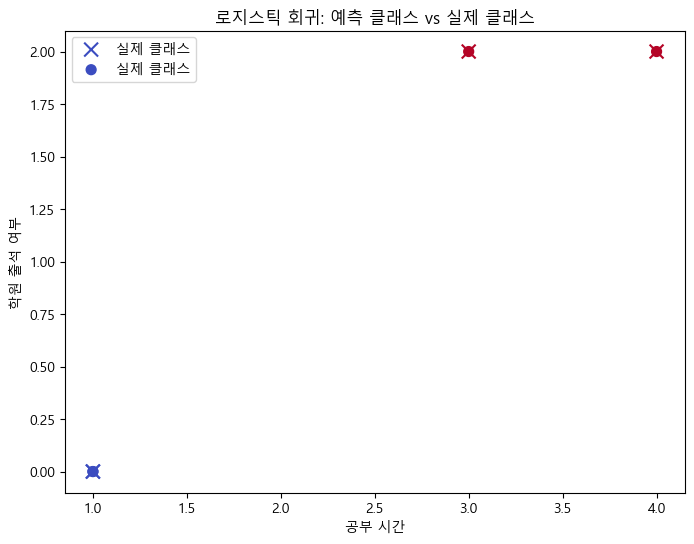

In [278]:
plt.figure(figsize=(8, 6))
plt.scatter(Xs_test['공부 시간'], Xs_test['학업 성취도'], c=ys_test, cmap='coolwarm', marker='x', s=100, label='실제 클래스')
plt.scatter(Xs_test['공부 시간'], Xs_test['학업 성취도'], c=ys_pred, cmap='coolwarm', marker='o', s=50, label='실제 클래스')
plt.xlabel('공부 시간')
plt.ylabel('학원 출석 여부')
plt.title('로지스틱 회귀: 예측 클래스 vs 실제 클래스')
plt.legend()
plt.show()

### 실습

In [268]:
import pydataset

data = pydataset.data('mtcars')
car = data.rename(columns={
    'mpg' : '연비',
    'cyl' : '실린더 수',
    'disp' : '엔진 배기량',
    'hp' : '마력',
    'drat' : '후방 차축 기어',
    'wt' : '무게',
    'qsec' : '1/4마일 주행 시간',
    'vs' : '엔진 모양',
    'am' : '변속기',
    'gear' : '전진 기어 수',
    'carb' : '카뷰레터 수'
})

car.head()

,연비,실린더 수,엔진 배기량,마력,후방 차축 기어,무게,1/4마일 주행 시간,엔진 모양,변속기,전진 기어 수,카뷰레터 수
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


1. 연비를 종속변수로 하는 회귀분석 해보기

In [274]:
X1 = car.drop(columns=['연비'])
y1 = car['연비']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

Linear Regression

In [275]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

LinearRegression()

In [279]:
y1_pred = lr1.predict(X1_test)

print(f'기울기: {lr1.coef_}')

기울기: [-0.4762499   0.01831107 -0.00950031  1.00213048 -4.86203707  1.84095198
 -1.93718579  1.07662425  1.32710759  0.14713125]


In [283]:
r1 = pd.DataFrame({
    '실린더 수': X1_test['실린더 수'],
    '엔진 배기량': X1_test['엔진 배기량'],
    '마력': X1_test['마력'],
    '후방 차축 기어': X1_test['후방 차축 기어'],
    '무게': X1_test['무게'],
    '1/4마일 주행 시간': X1_test['1/4마일 주행 시간'],
    '엔진 모양': X1_test['엔진 모양'],
    '변속기': X1_test['변속기'],
    '전진 기어 수': X1_test['전진 기어 수'],
    '카뷰레터 수': X1_test['카뷰레터 수'],
    '실제 연비': y1_test,
    '예측 연비': y1_pred
})

r1

,실린더 수,엔진 배기량,마력,후방 차축 기어,무게,1/4마일 주행 시간,엔진 모양,변속기,전진 기어 수,카뷰레터 수,실제 연비,예측 연비
Ferrari Dino,6,145.0,175,3.62,2.770,15.50,0,1,5,6,19.7,19.830927
Lincoln Continental,8,460.0,215,3.00,5.424,17.82,0,0,3,4,10.4,10.987142
Pontiac Firebird,8,400.0,175,3.08,3.845,17.05,0,0,3,2,19.2,16.314021
Fiat 128,4,78.7,66,4.08,2.200,19.47,1,1,4,1,32.4,27.145907
Merc 230,4,140.8,95,3.92,3.150,22.90,1,0,4,2,22.8,28.613212
Merc 280,6,167.6,123,3.92,3.440,18.30,1,0,4,4,19.2,18.301333
Maserati Bora,8,301.0,335,3.54,3.570,14.60,0,1,5,8,15.0,14.882511


In [285]:
r21 = r2_score(y1_test, y1_pred)
rmse1 = root_mean_squared_error(y1_test, y1_pred)

print(f'결정계수: {r21}, 평균 제곱근 오차: {rmse1}')

결정계수: 0.7466453084791003, 평균 제곱근 오차: 3.182790390174522


Lasso

In [286]:
la1 = Lasso(alpha=0.1)
la1.fit(X1_train, y1_train)

Lasso(alpha=0.1)

In [289]:
y1la_pred = la1.predict(X1_test)

print(f'기울기: {la1.coef_}')

기울기: [-0.59780813  0.00479727 -0.02594623  0.55862933 -2.92588756  0.24628507
  0.          0.16353608  0.67253911 -0.07278198]


In [295]:
la_un = []
la_im = {}
f = X1_test.columns

for i in range(len(la1.coef_)):
    if la1.coef_[i] == 0:
        la_un.append(f[i])
    else:
        la_im[f[i]] = round(la1.coef_[i], 3)

print(f'중요: {la_im}, \n안중요: {la_un}')

중요: {'실린더 수': np.float64(-0.598), '엔진 배기량': np.float64(0.005), '마력': np.float64(-0.026), '후방 차축 기어': np.float64(0.559), '무게': np.float64(-2.926), '1/4마일 주행 시간': np.float64(0.246), '변속기': np.float64(0.164), '전진 기어 수': np.float64(0.673), '카뷰레터 수': np.float64(-0.073)}, 
안중요: ['엔진 모양']


In [296]:
r21la = r2_score(y1_test, y1la_pred)
rmse1la = root_mean_squared_error(y1_test, y1la_pred)

print(f'결정계수: {r21la}, 평균 제곱근 오차: {rmse1la}')

결정계수: 0.8205151809532092, 평균 제곱근 오차: 2.67890568266015


Ridge

In [303]:
ri1 = Ridge(alpha=1.5)
ri1.fit(X1_train, y1_train)

Ridge(alpha=1.5)

In [304]:
y1ri_pred = ri1.predict(X1_test)

print(f'기울기: {ri1.coef_}')

기울기: [-4.34588874e-01  2.05318646e-03 -2.16517986e-02  1.04220897e+00
 -2.18449816e+00  3.62262504e-01 -8.24135149e-02  8.34749296e-01
  8.91861554e-01 -4.80194548e-01]


In [305]:
r21ri = r2_score(y1_test, y1ri_pred)
rmse1ri = root_mean_squared_error(y1_test, y1ri_pred)

print(f'결정계수: {r21ri}, 평균 제곱근 오차: {rmse1ri}')

결정계수: 0.8277232616512966, 평균 제곱근 오차: 2.6245622815131986


시각화

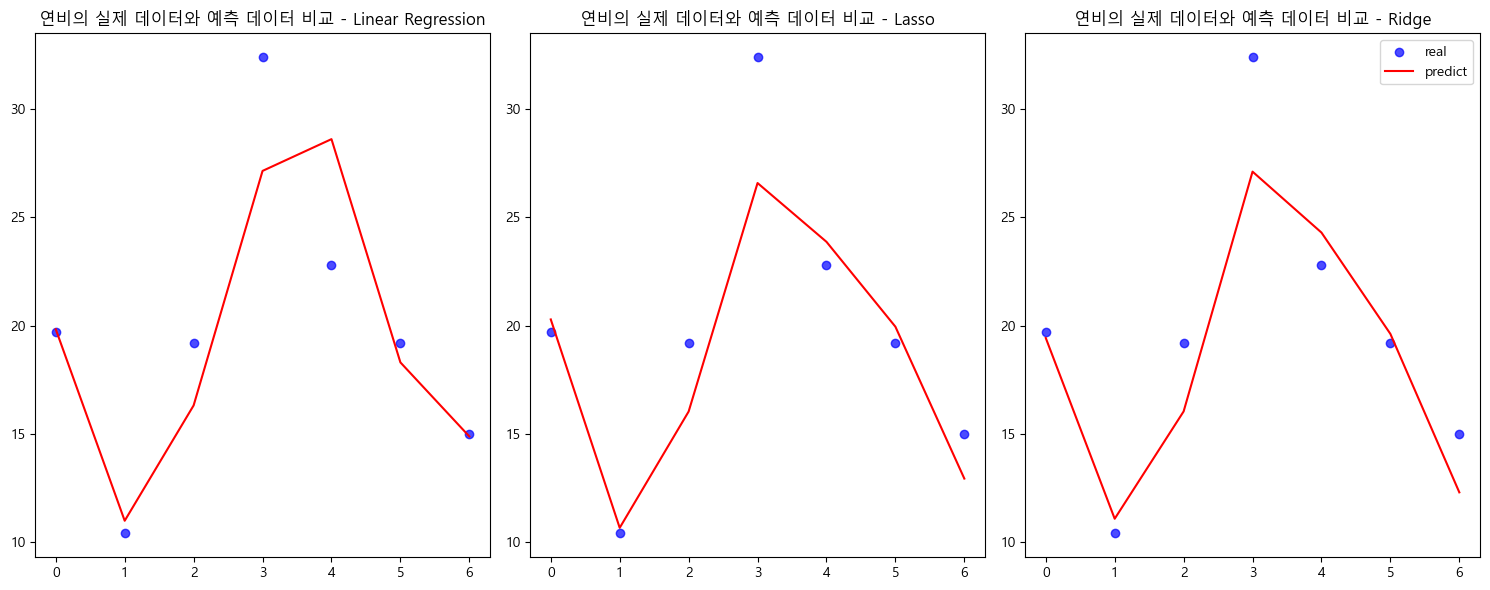

In [307]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].scatter(range(len(y1_test)), y1_test, color='blue', alpha=.7, label='real')
axs[0].plot(y1_pred, color='red', label='predict')
axs[0].set_title('연비의 실제 데이터와 예측 데이터 비교 - Linear Regression')

axs[1].scatter(range(len(y1_test)), y1_test, color='blue', alpha=.7, label='real')
axs[1].plot(y1la_pred, color='red', label='predict')
axs[1].set_title('연비의 실제 데이터와 예측 데이터 비교 - Lasso')

axs[2].scatter(range(len(y1_test)), y1_test, color='blue', alpha=.7, label='real')
axs[2].plot(y1ri_pred, color='red', label='predict')
axs[2].set_title('연비의 실제 데이터와 예측 데이터 비교 - Ridge')

plt.legend()
plt.tight_layout()
plt.show()

2. 자동차의 무게나 마력(wt, hp)이 연비에 미치는 영향 분석해보기

In [310]:
X2 = car[['무게', '마력']]
y2 = car['연비']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [312]:
y2_pred = lr2.predict(X2_test)

print(f'기울기: {lr2.coef_}')

기울기: [-3.75233575 -0.03431681]


In [313]:
r22 = r2_score(y2_test, y2_pred)
rmse2 = root_mean_squared_error(y2_test, y2_pred)

print(f'결정계수: {r22}, 평균 제곱근 오차: {rmse2}')

결정계수: 0.7880448439485954, 평균 제곱근 오차: 2.9111565162356143


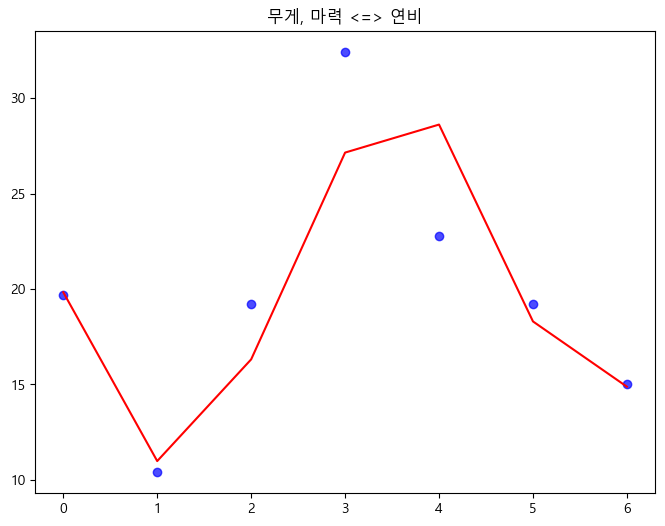

In [314]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y1_test)), y1_test, color='blue', alpha=.7, label='real')
plt.plot(y1_pred, color='red', label='predict')
plt.title('무게, 마력 <=> 연비')
plt.show()

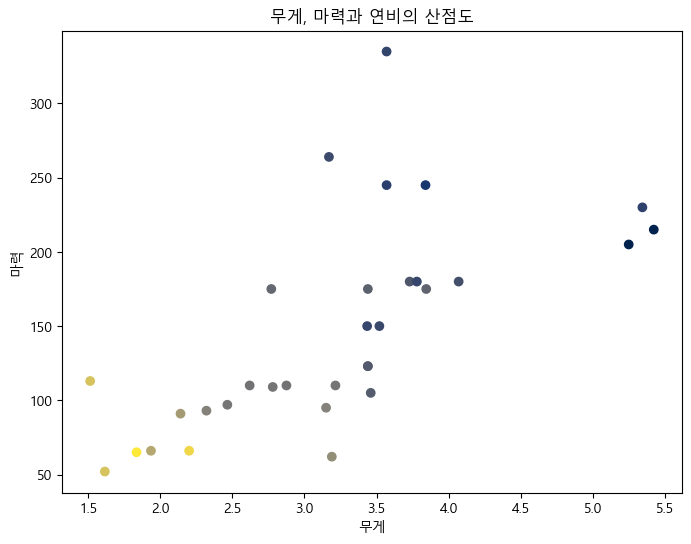

In [319]:
plt.figure(figsize=(8, 6))
plt.scatter(car['무게'], car['마력'], c=car['연비'], cmap='cividis')
plt.title('무게, 마력과 연비의 산점도')
plt.xlabel('무게')
plt.ylabel('마력')
plt.show()

3. 다양한 변수 간 상관관계 파악해보기

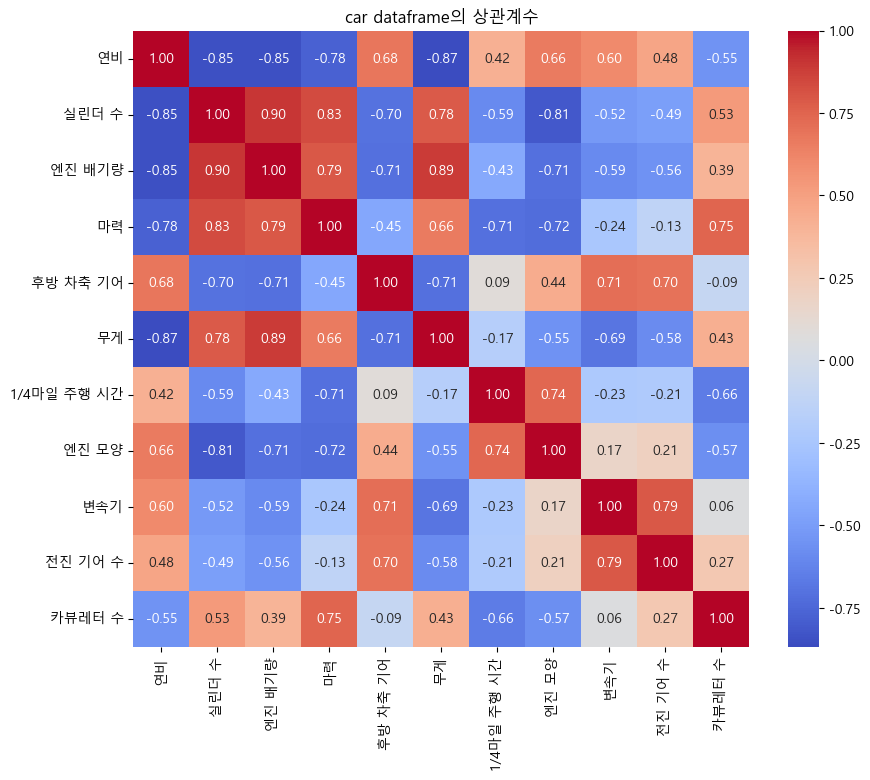

In [309]:
plt.figure(figsize=(10, 8))
sns.heatmap(car.corr(), annot=True, square=True, fmt='.2f', cmap='coolwarm')
plt.title('car dataframe의 상관계수')
plt.show()

In [333]:
# 피어슨

p, pp = pearsonr(car['무게'], car['연비'])
print(f'피어슨 상관계수: {p}, p_value: {pp}')

피어슨 상관계수: -0.8676593765172278, p_value: 1.293958701350513e-10


In [332]:
# 스피어만

s, sp = spearmanr(car['1/4마일 주행 시간'], car['연비'])
print(f'스피어만 상관계수: {s}, p_value: {sp}')

스피어만 상관계수: 0.4669357548683366, p_value: 0.007055765003859273


In [334]:
s2, sp2 = spearmanr(car['실린더 수'], car['연비'])
print(f'스피어만 상관계수: {s2}, p_value: {sp2}')

스피어만 상관계수: -0.9108013108624785, p_value: 4.690287037356306e-13


In [335]:
s3, sp3 = spearmanr(car['카뷰레터 수'], car['연비'])
print(f'스피어만 상관계수: {s3}, p_value: {sp3}')

스피어만 상관계수: -0.6574976430552347, p_value: 4.3375704676694645e-05


4. 무게가 연비에 미치는 영향 산점도로 시각화해보기

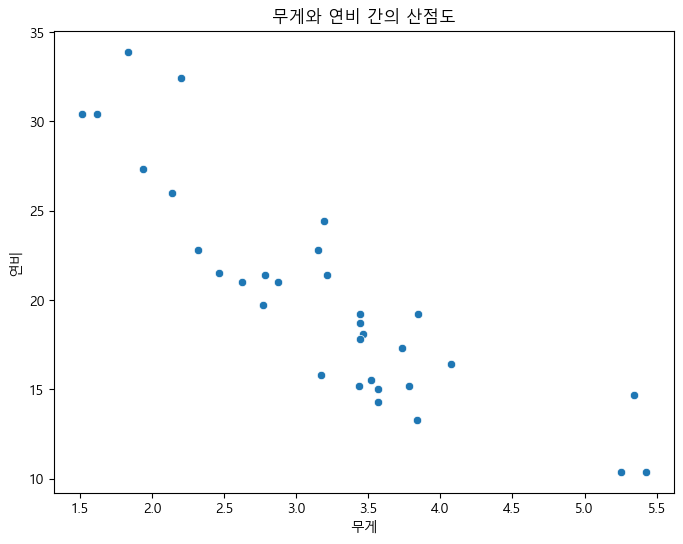

In [315]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=car, x='무게', y='연비')
plt.title('무게와 연비 간의 산점도')
plt.show()

+) Lasso 수행 시 가중치가 제거되었던 변수(엔진 모양)를 제거하고 예측

In [322]:
X5 = car.drop(columns=['연비', '엔진 모양'])
y5 = car['연비']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

In [323]:
lr5 = LinearRegression()
lr5.fit(X5_train, y5_train)

LinearRegression()

In [324]:
y5_pred = lr5.predict(X5_test)

print(f'기울기: {lr5.coef_}')

기울기: [-0.20162496  0.01647884 -0.01928745  1.0957245  -4.17996636  1.19798301
  1.29333951  1.07117343  0.05865569]


In [328]:
r25 = r2_score(y5_test, y5_pred)
rmse5 = root_mean_squared_error(y5_test, y5_pred)

print(f'변수 제거 전 결정계수: {r21}, 평균 제곱근 오차: {rmse1}')
print(f'결정계수: {r25}, 평균 제곱근 오차: {rmse5}')

변수 제거 전 결정계수: 0.7466453084791003, 평균 제곱근 오차: 3.182790390174522
결정계수: 0.8237962339230495, 평균 제곱근 오차: 2.6543070219553906


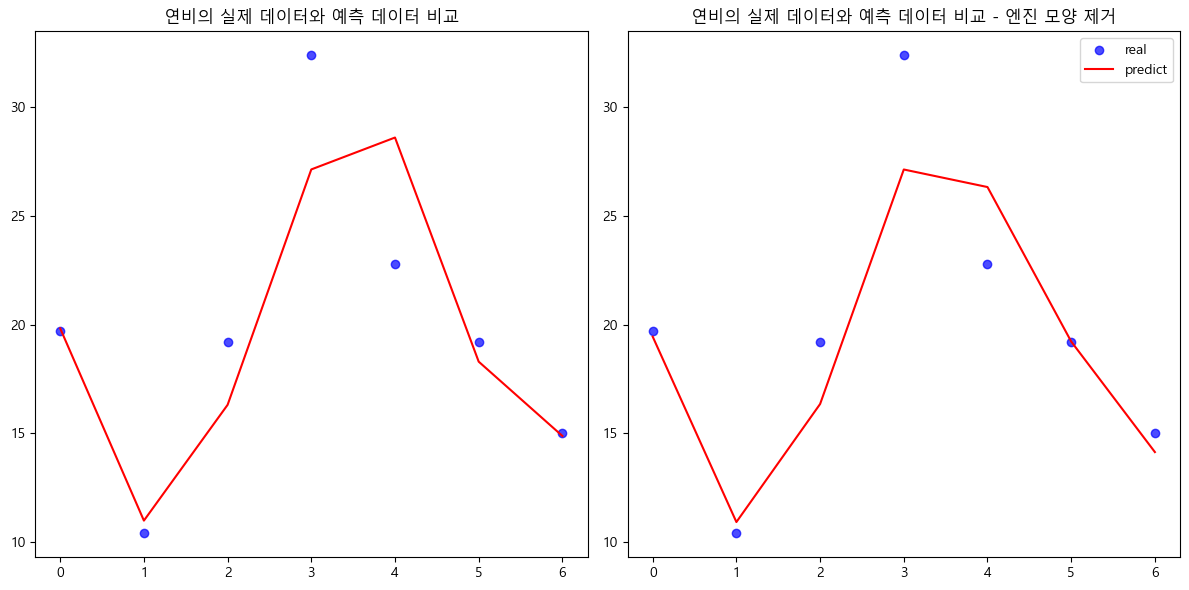

In [327]:
fig5, axs5 = plt.subplots(1, 2, figsize=(12, 6))

axs5[0].scatter(range(len(y1_test)), y1_test, color='blue', alpha=.7, label='real')
axs5[0].plot(y1_pred, color='red', label='predict')
axs5[0].set_title('연비의 실제 데이터와 예측 데이터 비교')

axs5[1].scatter(range(len(y5_test)), y5_test, color='blue', alpha=.7, label='real')
axs5[1].plot(y5_pred, color='red', label='predict')
axs5[1].set_title('연비의 실제 데이터와 예측 데이터 비교 - 엔진 모양 제거')

plt.legend()
plt.tight_layout()
plt.show()